# YOLO图像对象检测
##### def yolo_eval(yolo_outputs, anchors,  num_classes, image_shape, max_boxes=40, score_threshold=.6,iou_threshold=.5)
    模型测试
    模型输入:
        yolo_model.input --- inputs,shape=>(batch_size,416,416,3)
        image_shape -------- 图像真实尺寸，如(533,400)
    模型输出:boxes, scores, classes
        boxes --- 预测外框,[n x 4],=>()
        scores--- 预测分数,[n x 1]
        classes-- 预测类别,[n x 1]        

In [1]:
%matplotlib inline
import os
import pdb
#pdb.set_trace()
import sys
import argparse
from yolo import YOLO, detect_video
from PIL import Image
import matplotlib.pyplot as plt

#运行参数
data_path='%s/work/data/yolo'%os.getenv('HOME')
params_20={
        "model_path": '%s/mytrain_model_data/yolo_weights.h5'%(data_path),    #yolo.h5
        "anchors_path": '%s/mytrain_model_data/yolo_anchors.txt'%(data_path), #9个锚点
        "classes_path": '%s/mytrain_model_data/voc_classes.txt'%(data_path),  #20个分类 #voc_classes.txt
        "log_path":'%s/mytrain_model_data/log/preds'%(data_path),             #日志目录
        "score" : 0.3,
        "iou" : 0.45,
        "model_image_size" : (416, 416),
        "gpu_num" : 1,
        }
params_80={
        "model_path": '%s/model_data/yolo.h5'%(data_path),             #yolo.h5
        "anchors_path": '%s/model_data/yolo_anchors.txt'%(data_path),  #9个锚点
        "classes_path": '%s/model_data/coco_classes.txt'%(data_path),  #80个分类 #coco_classes.txt
        "log_path":'%s/model_data/log/preds'%(data_path),              #日志目录
        "score" : 0.3,
        "iou" : 0.45,
        "model_image_size" : (416, 416),
        "gpu_num" : 1,
        }

params=params_20
yolo=YOLO(**params)
for i,layer in enumerate(yolo.yolo_model.layers):
    print('{:0>3d}:{name}'.format(i,name=layer.name))

Using TensorFlow backend.


==============__init__=>kwargs:===========

classes_path:/home/hjw/work/data/yolo/mytrain_model_data/voc_classes.txt
log_path:/home/hjw/work/data/yolo/mytrain_model_data/log/preds
iou:0.45
score:0.3
anchors_path:/home/hjw/work/data/yolo/mytrain_model_data/yolo_anchors.txt
gpu_num:1
model_image_size:(416, 416)
model_path:/home/hjw/work/data/yolo/mytrain_model_data/yolo_weights.h5
==============__init__=>kwargs{end}=======

============generate=============
/home/hjw/work/data/yolo/mytrain_model_data/yolo_weights.h5 model, anchors, and classes loaded.
self.yolo.model.output.shape:
[TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(75)]), TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(75)]), TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(75)])]
self.anchors: [[ 22.  33.]
 [ 46.  52.]
 [ 58. 113.]
 [106. 186.]
 [107.  76.]
 [188. 274.]
 [202. 132.]
 [374. 195.]
 [374. 337.]]
self.class_names: ['aeroplane', 'bicyc

Found 0 boxes for img
end - start: 1.3355473130068276
time2 - start: 1.3348994350017165
time2 - time1: 1.3174013749958249


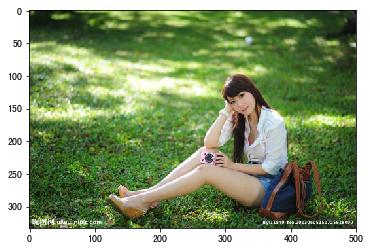

In [5]:

img_file='%s/1.jpg'%(data_path)
img=Image.open(img_file)
r_image=yolo.detect_image(img)
#r_image.show()
plt.imshow(r_image)

In [4]:
yolo.close_session()